<a href="https://colab.research.google.com/github/JaumeMartorell/Data-Visualization/blob/main/A5_Visualizaci%C3%B3n_efectiva_y_storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Carga de los datos desde dos datasets para incluir el continente**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation



df = pd.read_csv('/content/drive/MyDrive/Máster Universidad Europea/Asignaturas 2/Visualización de datos/A5. Visualización efectiva y storytelling/energy.csv')
paises = pd.read_csv('/content/drive/MyDrive/Máster Universidad Europea/Asignaturas 2/Visualización de datos/A5. Visualización efectiva y storytelling/paises.csv')

df.drop(columns = 'Unnamed: 0', inplace = True)
df = df[df['Country'] !='World']

#Hacemos un merge de los dos DataFrames para incluir el continente de cada pais
paises.rename(columns={' name': 'Country'}, inplace=True)
paises.columns
paises.drop(columns = ['nombre', ' nom', ' iso2', ' iso3', ' phone_code'], inplace=True)

df = pd.merge(df, paises, on='Country')

#Eliminamos en continente Antátrida
df = df[df['continente']!='Antártida']

#creamos un df_energy que solamente contiene la energía total consumida
df_energy_tot = df[df['Energy_type']=='all_energy_types']
df_energy_tot.reset_index(inplace=False)


df_energy_tot

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,continente
0,Afghanistan,all_energy_types,1980,0.026583,0.072561,NaN,13356.5,1.990283,0.000000,NaN,Asia
6,Afghanistan,all_energy_types,1981,0.029949,0.092724,NaN,13171.7,2.273773,0.000000,1.325965,Asia
12,Afghanistan,all_energy_types,1982,0.031898,0.095068,NaN,12882.5,2.476058,0.000000,1.509628,Asia
18,Afghanistan,all_energy_types,1983,0.039022,0.099713,NaN,12537.7,3.112357,0.000000,1.659605,Asia
24,Afghanistan,all_energy_types,1984,0.039202,0.099827,NaN,12204.3,3.212166,0.000000,2.059605,Asia
...,...,...,...,...,...,...,...,...,...,...,...
47250,Zimbabwe,all_energy_types,2015,0.186477,0.155347,37.0160,13814.6,13.498561,5.037747,11.298275,África
47256,Zimbabwe,all_energy_types,2016,0.159231,0.119508,37.2958,14030.3,11.349064,4.269402,11.820449,África
47262,Zimbabwe,all_energy_types,2017,0.156740,0.111040,39.0502,14236.6,11.009673,4.013816,10.417494,África
47268,Zimbabwe,all_energy_types,2018,0.162084,0.131055,40.9362,14445.4,11.220442,3.959424,9.243046,África


In [ ]:
df_energy_tot.isnull().sum()

Country                           0
Energy_type                       0
Year                              0
Energy_consumption              335
Energy_production               335
GDP                            1785
Population                      891
Energy_intensity_per_capita     495
Energy_intensity_by_GDP         495
CO2_emission                    531
continente                        0
Energy_production_renovable     335
dtype: int64

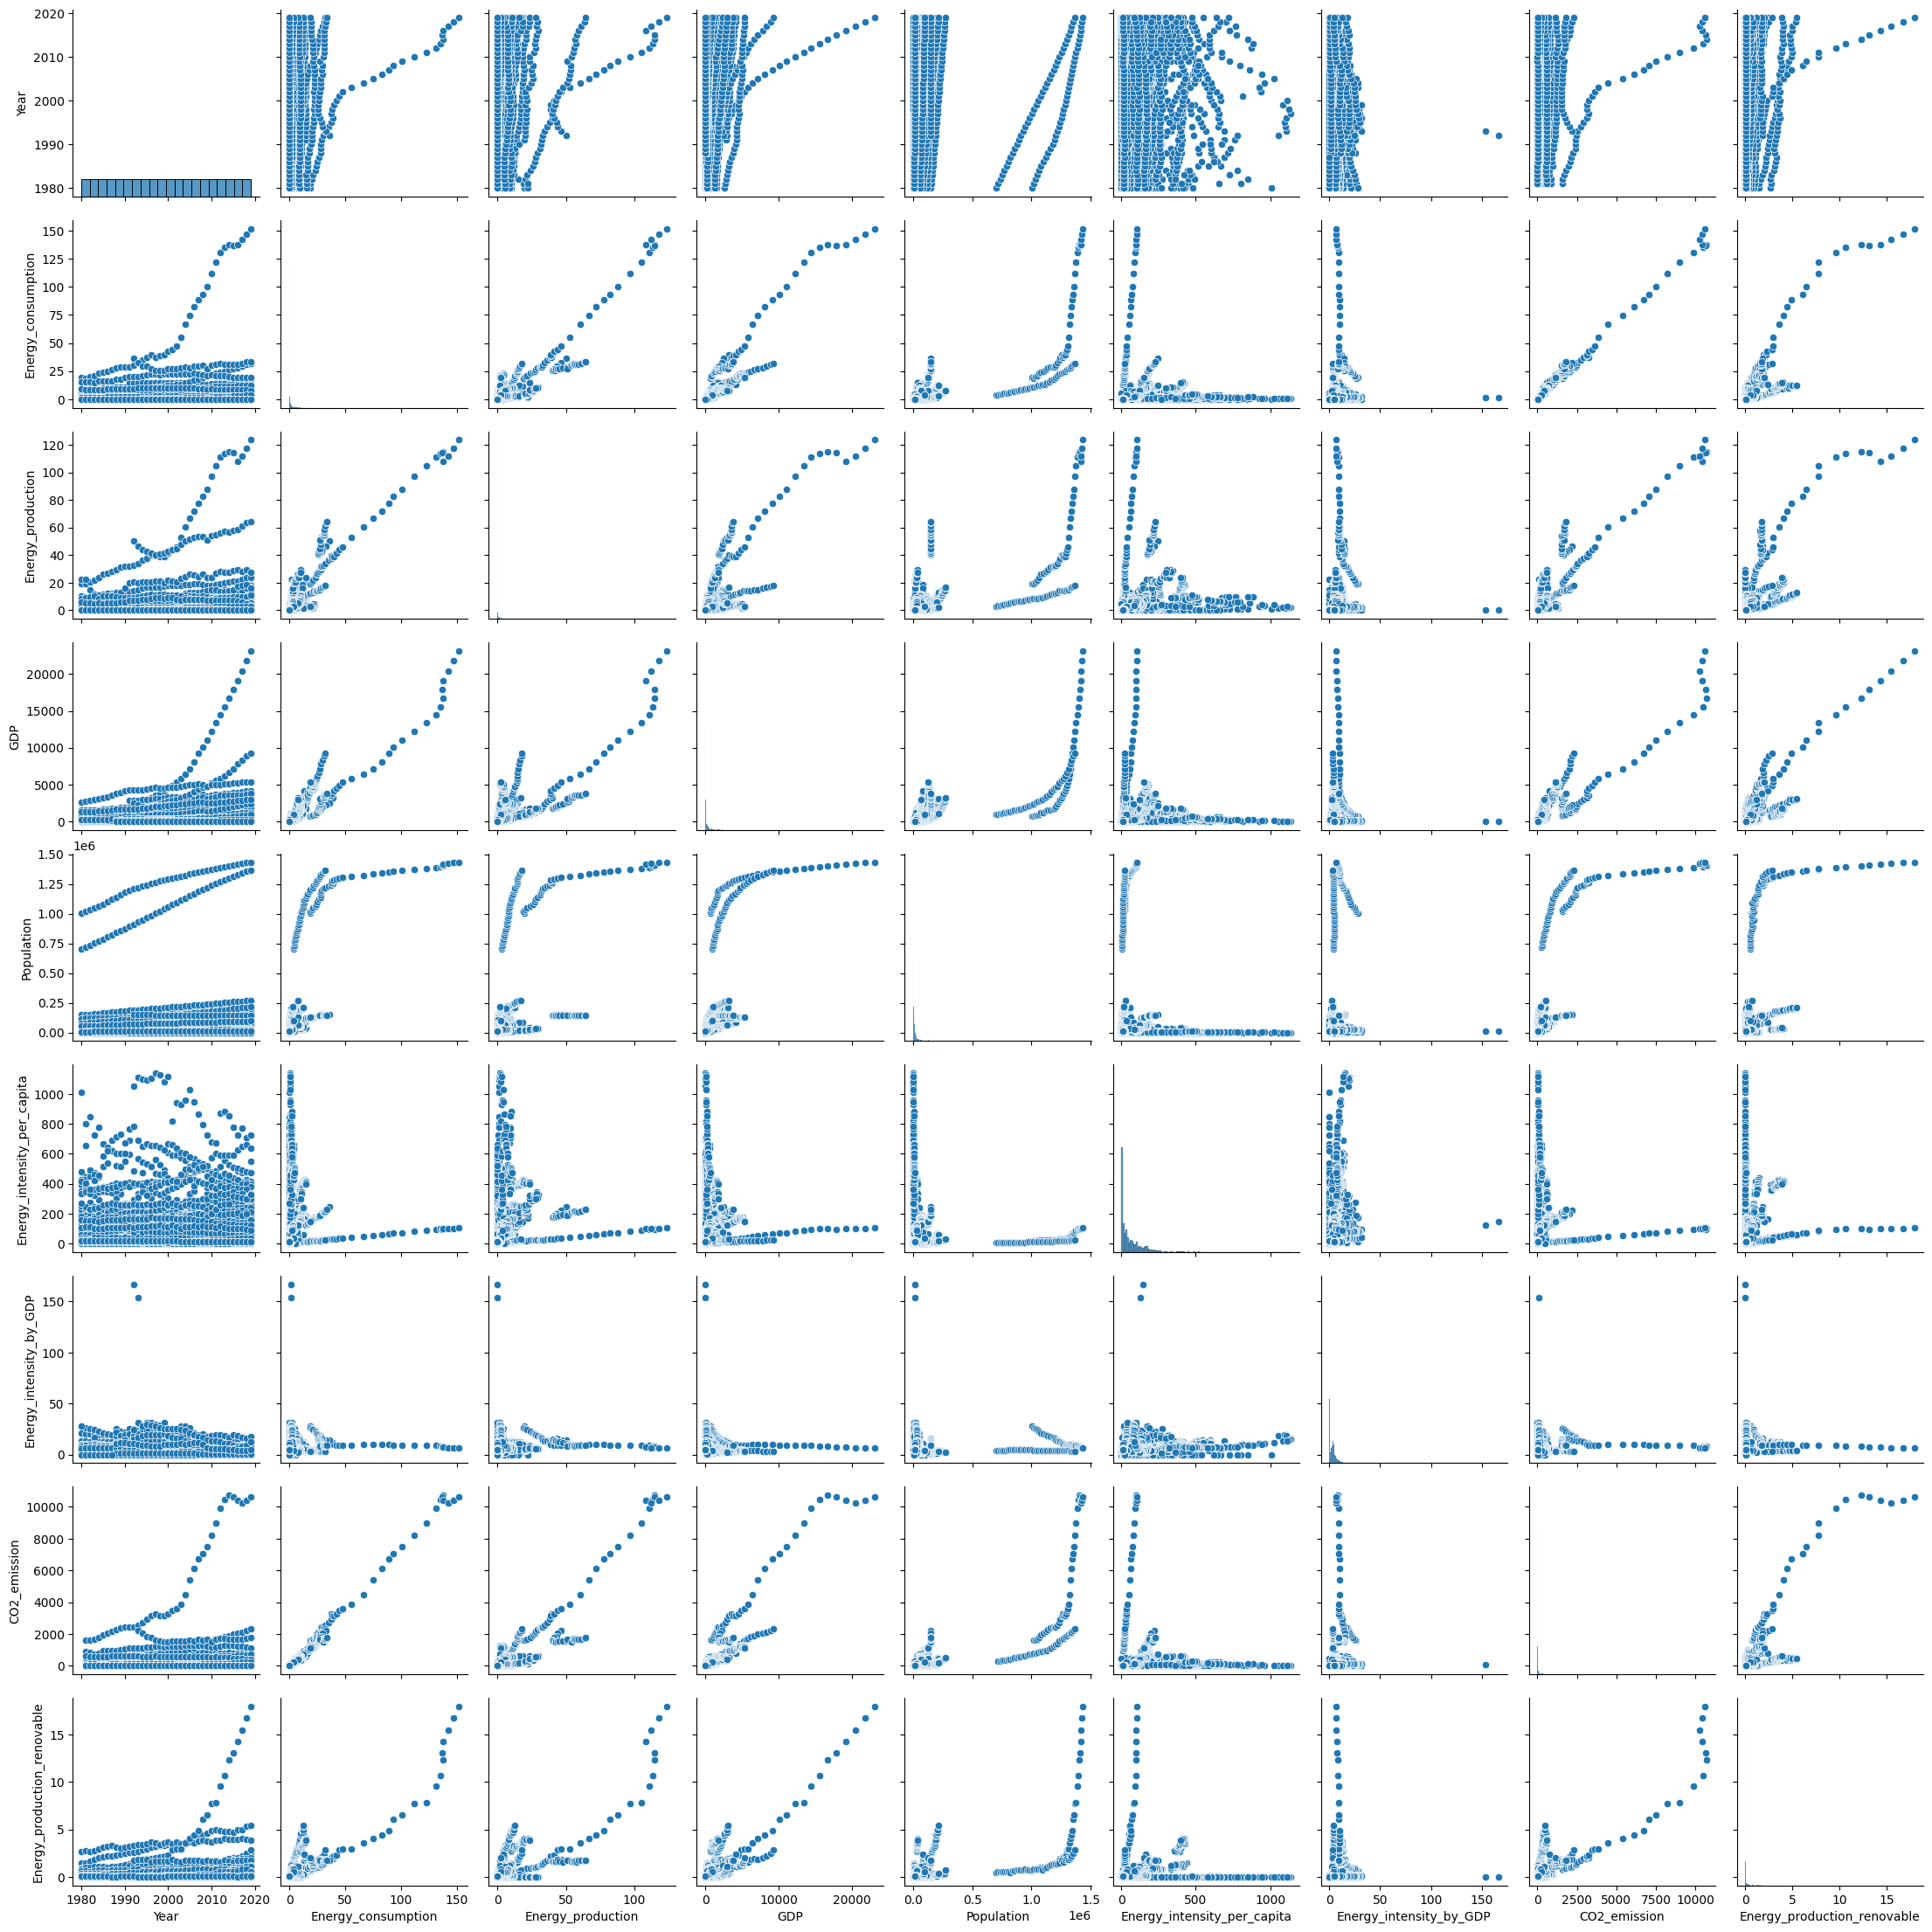

In [ ]:
sns.pairplot(df_energy_tot)

# **Label paises ricos y pobres**

In [ ]:
mean_GDP = df_energy_tot[df_energy_tot['Year']==2019]['GDP'].mean()
mean_GDP

def rico_vs_pobre(elemento):
    if elemento > mean_GDP:
        return 'Rico'
    else:
        return 'Pobre'

# Se consideran ricos aquellos paises que son ricos en el 2019
df_energy_tot['Rico_vs_pobre'] = df_energy_tot[df_energy_tot['Year']==2019]['GDP'].apply(rico_vs_pobre)

df_energy_tot_2019 = df_energy_tot[df_energy_tot['Year'] == 2019].copy()
df_energy_tot_2019['Rico_vs_pobre'] = df_energy_tot_2019['GDP'].apply(rico_vs_pobre)

# Obtener una lista de los países ricos en 2019
countries_rico = df_energy_tot_2019[df_energy_tot_2019['Rico_vs_pobre'] == 'Rico']['Country'].tolist()

# Crear la columna 'Rico_vs_pobre' en el DataFrame original
df_energy_tot['Rico_vs_pobre'] = df_energy_tot['Country'].apply(lambda x: 'Rico' if x in countries_rico else 'Pobre')


<ipython-input-13-dc2c206c88b1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy_tot['Rico_vs_pobre'] = df_energy_tot[df_energy_tot['Year']==2019]['GDP'].apply(rico_vs_pobre)
<ipython-input-13-dc2c206c88b1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy_tot['Rico_vs_pobre'] = df_energy_tot['Country'].apply(lambda x: 'Rico' if x in countries_rico else 'Pobre')


# **Consumo de los paises más ricos y más pobres**

In [ ]:
df_filt = df_energy_tot[df_energy_tot['Year']==1990].dropna()


In [ ]:
energy = df_filt['Energy_consumption'].sum()

energy_rico = round(df_filt[(df_filt['Rico_vs_pobre']=='Rico')]['Energy_consumption'].sum()/energy,2)*100
energy_pobre = round(df_filt[(df_filt['Rico_vs_pobre']=='Pobre')]['Energy_consumption'].sum()/energy,2)*100


print('Los paises más ricos consumen un ',energy_rico,'de la energía')

print('Los paises más pobres consumen ',energy_pobre,'de la energía')

Los paises más ricos consumen un  82.0 de la energía
Los paises más pobres consumen  18.0 de la energía


# **Contaje paises ricos y pobres**

80.0 20.0


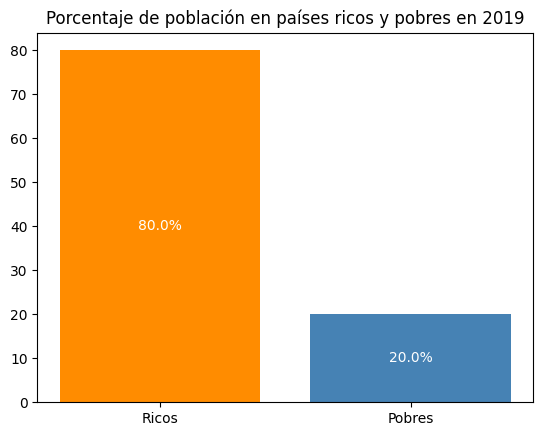

In [ ]:
# Obtener la población de paises ricos de países ricos y pobres

pop_total = df_energy_tot['Population'].sum()

pop_ricos = df_energy_tot[df_energy_tot['Rico_vs_pobre']=='Rico']['Population'].sum()
pop_pobres = df_energy_tot[df_energy_tot['Rico_vs_pobre']=='Pobre']['Population'].sum()

pop_ricos = round(pop_ricos/pop_total,2) *100
pop_pobres = round(pop_pobres/pop_total,2) *100

print(pop_ricos, pop_pobres)

# Crear el gráfico de barras
fig, ax = plt.subplots()
bars = ax.bar(['Ricos', 'Pobres'], [pop_ricos, pop_pobres], color=[ 'darkorange','steelblue'])

# Agregar etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height / 2, f'{height}%', ha='center', va='center', color='white')

# Agregar título y etiquetas
ax.set_title('Porcentaje de población en países ricos y pobres en 2019')


# Mostrar el gráfico
plt.show()

Porcentaje de países ricos: 16.84%
Porcentaje de países pobres: 83.16%


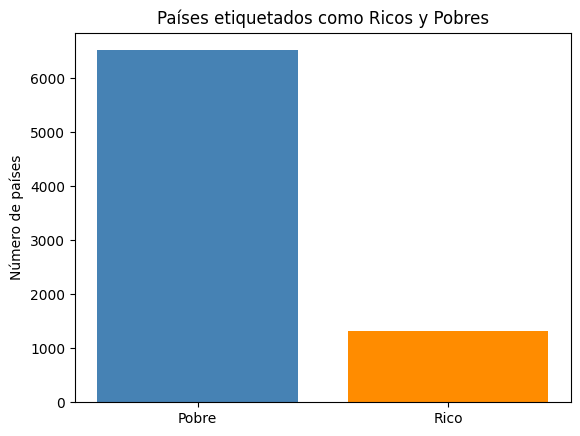

In [ ]:
counts = df_energy_tot['Rico_vs_pobre'].value_counts()

# Obtener el número de países ricos y pobres
num_ricos = counts['Rico']
num_pobres = counts['Pobre']

# Calcular el porcentaje de países ricos y pobres
total_paises = len(df_energy_tot)  # Total de países en el DataFrame

porcentaje_ricos = (num_ricos / total_paises) * 100
porcentaje_pobres = (num_pobres / total_paises) * 100

print(f"Porcentaje de países ricos: {porcentaje_ricos:.2f}%")
print(f"Porcentaje de países pobres: {porcentaje_pobres:.2f}%")

counts = df_energy_tot['Rico_vs_pobre'].value_counts()

# Crear el gráfico de barras
plt.bar(counts.index, counts.values, color = ['steelblue', 'darkorange'])

# Agregar título y etiquetas
plt.title('Países etiquetados como Ricos y Pobres')
plt.ylabel('Número de países')

# Mostrar el gráfico
plt.show()

# **Cómo es la correlación entre las emisiones y el consumo de energía?**

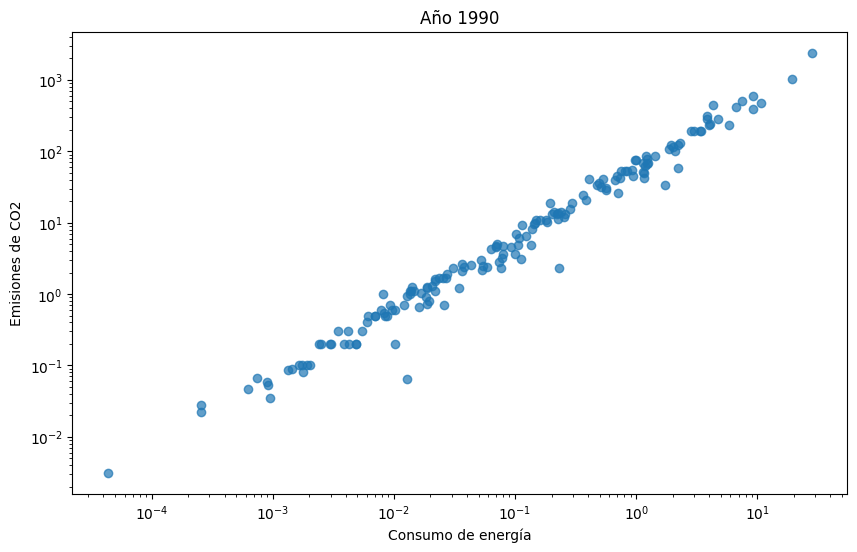

In [ ]:
###Energy production vs CO2 emission como evoluciona esta correlación?


plt.figure(figsize=(10, 6))
plt.scatter(df_energy_tot[df_energy_tot['Year']==1990]['Energy_consumption'], df_energy_tot[df_energy_tot['Year']==1990]['CO2_emission'], alpha=0.7)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Consumo de energía')
plt.ylabel('Emisiones de CO2')
plt.title('Año 1990')

plt.show()

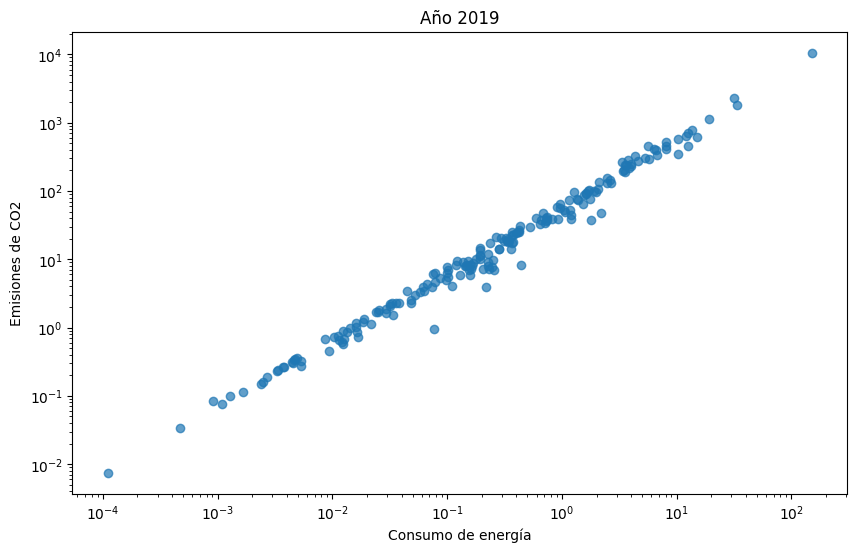

In [ ]:
###Energy production vs CO2 emission como evoluciona esta correlación?


plt.figure(figsize=(10, 6))
plt.scatter(df_energy_tot[df_energy_tot['Year']==2019]['Energy_consumption'], df_energy_tot[df_energy_tot['Year']==2019]['CO2_emission'], alpha=0.7)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Consumo de energía')
plt.ylabel('Emisiones de CO2')
plt.title('Año 2019')

plt.show()

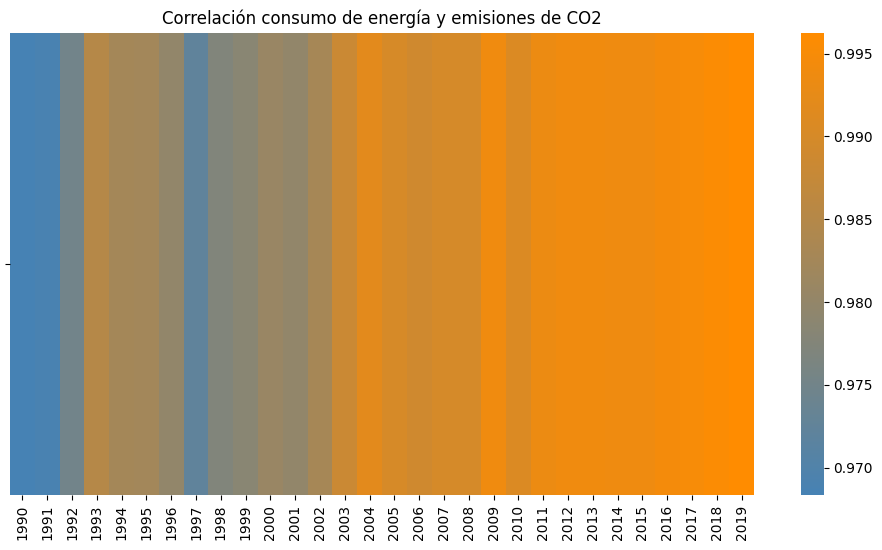

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Crear una lista para almacenar las correlaciones
correlations = []

# Obtener los años únicos en el DataFrame
years = df_energy_tot[df_energy_tot['Year']>1989]['Year'].unique()

# Calcular la correlación para cada año
for year in years:
    df_year = df_energy_tot[df_energy_tot['Year'] == year]
    corr = df_year['Energy_consumption'].corr(df_year['CO2_emission'])
    correlations.append({'Año': year, '': corr})

# Crear un DataFrame con las correlaciones
df_correlations = pd.DataFrame(correlations)

# Asegurarse de que los años estén ordenados
df_correlations = df_correlations.sort_values(by='Año')

# Crear un mapa de colores personalizado
colors = ['steelblue', 'darkorange']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Crear un heatmap con las correlaciones
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df_correlations.set_index('Año').T, cmap=cmap)

heatmap.set_xlabel('')
heatmap.set_ylabel('')
plt.title('Correlación consumo de energía y emisiones de CO2')

plt.show()

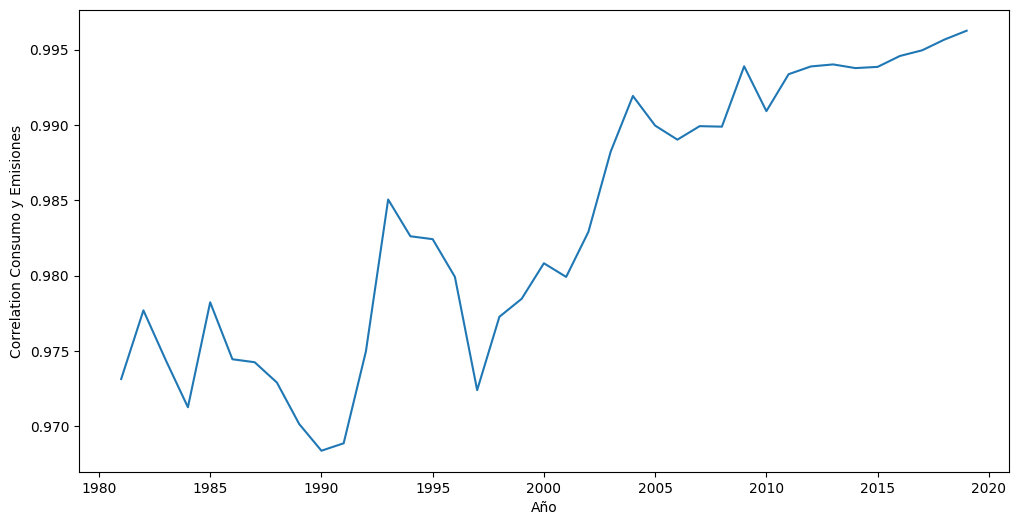

In [ ]:
# Crear una lista para almacenar las correlaciones
correlations = []

# Obtener los años únicos en el DataFrame
years = df_energy_tot['Year'].unique()

# Calcular la correlación para cada año
for year in years:
    df_year = df_energy_tot[df_energy_tot['Year'] == year]
    corr = df_year['Energy_consumption'].corr(df_year['CO2_emission'])
    correlations.append({'Year': year, 'Correlation': corr})

# Crear un DataFrame con las correlaciones
df_correlations = pd.DataFrame(correlations)

# Asegurarse de que los años estén ordenados
df_correlations = df_correlations.sort_values(by='Year')

# Crear un lineplot con las correlaciones
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_correlations, x='Year', y='Correlation')
#plt.title('Correlation Energy Consumption vs. CO2 Emission Over Years')
plt.xlabel('Año')
plt.ylabel('Correlation Consumo y Emisiones')
plt.show()

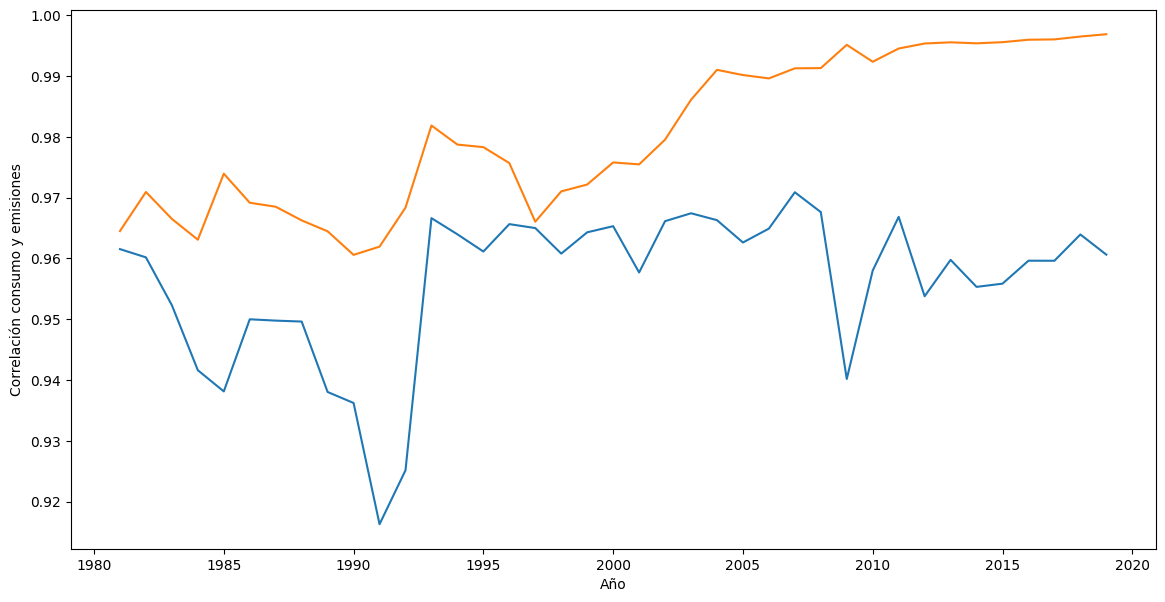

In [ ]:
# Agrupar por 'Year' y 'Rico vs pobre', luego aplicar la función de correlación
grouped = df_energy_tot.groupby(['Year', 'Rico_vs_pobre'])
d = {}

for (year, continent), group in grouped:
    if year not in d:
        d[year] = {}
    d[year][continent] = group['Energy_consumption'].corr(group['CO2_emission'])

df_corr = pd.DataFrame(d)

# Transponer el DataFrame para tener los años en el índice
df_corr = df_corr.T

# Resetear el índice para que los años sean una columna
df_corr.reset_index(inplace=True)
df_corr.rename(columns={'index': 'Year'}, inplace=True)

# Plot usando seaborn
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_corr, x='Year', y='Pobre')
sns.lineplot(data=df_corr, x='Year', y='Rico')

plt.xlabel('')
#plt.ylabel('Energy_consumption')

#plt.title('Correlación por Categoría a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Correlación consumo y emisiones')
plt.show()

# **Simulación scatterplot consumo energía con renta por cápita según continente y según ricos-pobres**

In [ ]:
# Filtraje de los 5 paises más ricos. Para etiquetarlos

gdp_per_country = df_energy_tot.groupby('Country')['GDP'].max().reset_index()

top_5_countries = gdp_per_country.sort_values(by='GDP', ascending=False).head(5)

countries_to_label = top_5_countries['Country'].tolist()

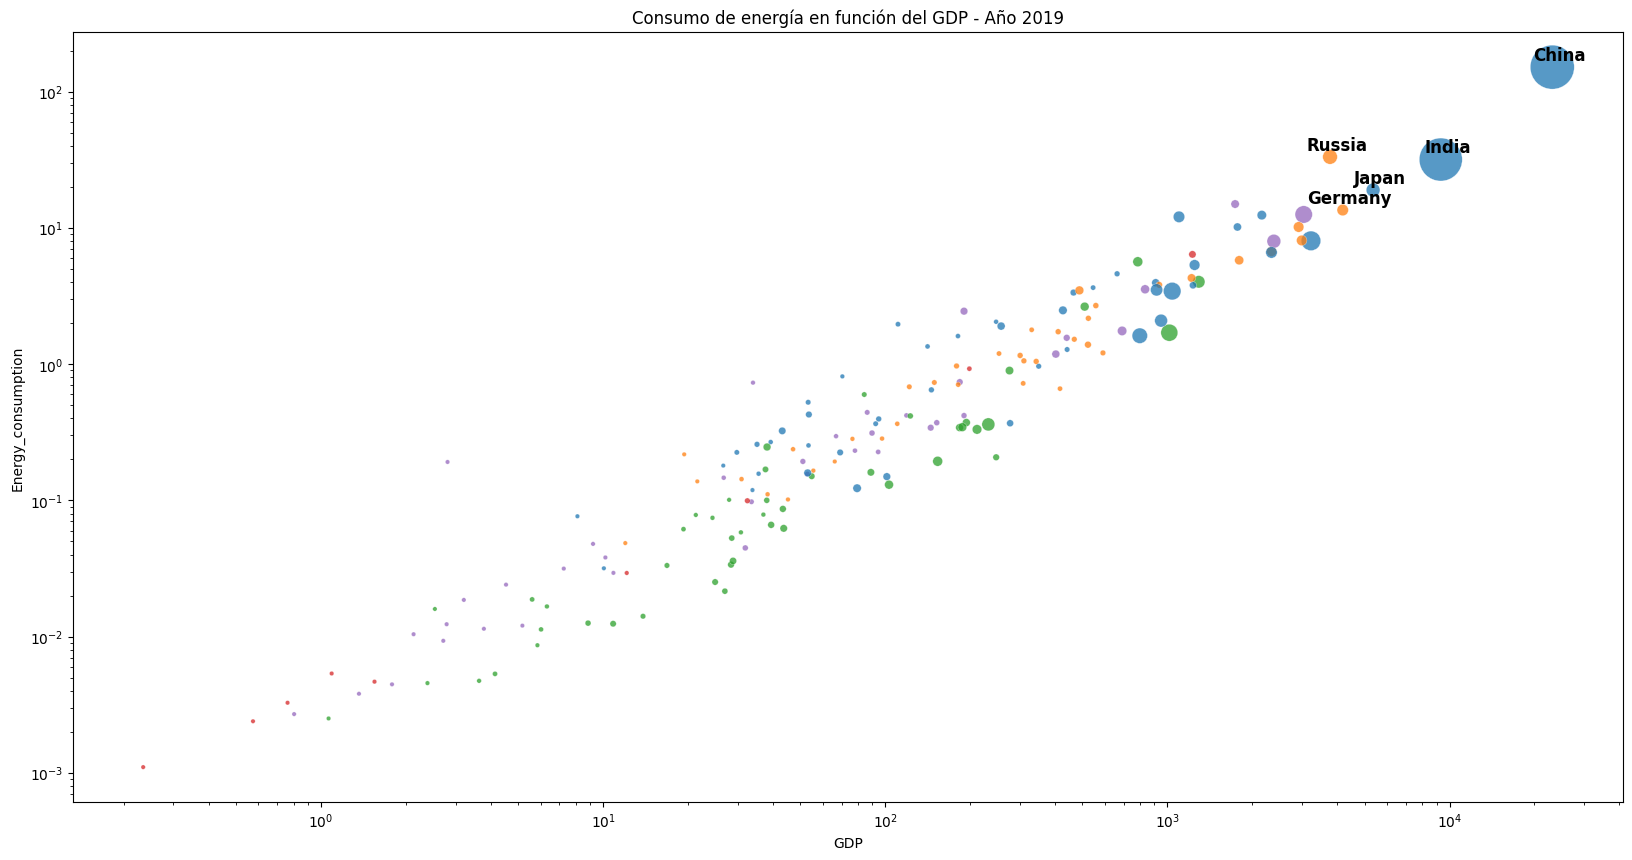

In [ ]:
# Obtener la lista de años únicos. Es cuando aparecen mas paises
years = df[df['Year']>1992]['Year'].unique()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(20, 10))

# Función para actualizar el gráfico en cada fotograma de la animación
def update(year):
    # Limpiar el eje antes de dibujar el nuevo gráfico
    ax.clear()

    # Filtrar el DataFrame por el año actual
    df_energy = df[(df['Energy_type'] == 'todas') & (df['Year'] == year)]

    # Crear el gráfico de dispersión
    sns.scatterplot(
        ax=ax, data=df_energy, x="GDP", y="Energy_consumption", hue='continente', size="Population",
        sizes=(10, 1000), alpha=0.75)

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlabel('GDP')
    ax.set_ylabel('Energy_consumption')
    ax.set_title(f'Consumo de energía en función del GDP - Año {year}')

    # Ajustar la leyenda
    ax.legend().remove()

    # Etiquetar los países seleccionados
    for country in countries_to_label:
        if country in df_energy['Country'].values:
            country_data = df_energy[df_energy['Country'] == country]
            for _, row in country_data.iterrows():
                ax.annotate(
                    country,
                    (row['GDP'], row['Energy_consumption']),
                    textcoords="offset points",
                    xytext=(5,5),
                    ha='center',
                    fontsize=12,
                    color='black',
                    weight='bold'
                )

# Crear la animación
anim = FuncAnimation(fig, update, frames=years, interval=1000, repeat=False)

anim.save('energy_consumption_continent.mp4', writer='ffmpeg', fps=1)  # Cambia 'ffmpeg' a 'imagemagick' para guardar como GIF

# Mostrar la animación en una ventana de visualización (opcional)
plt.show()

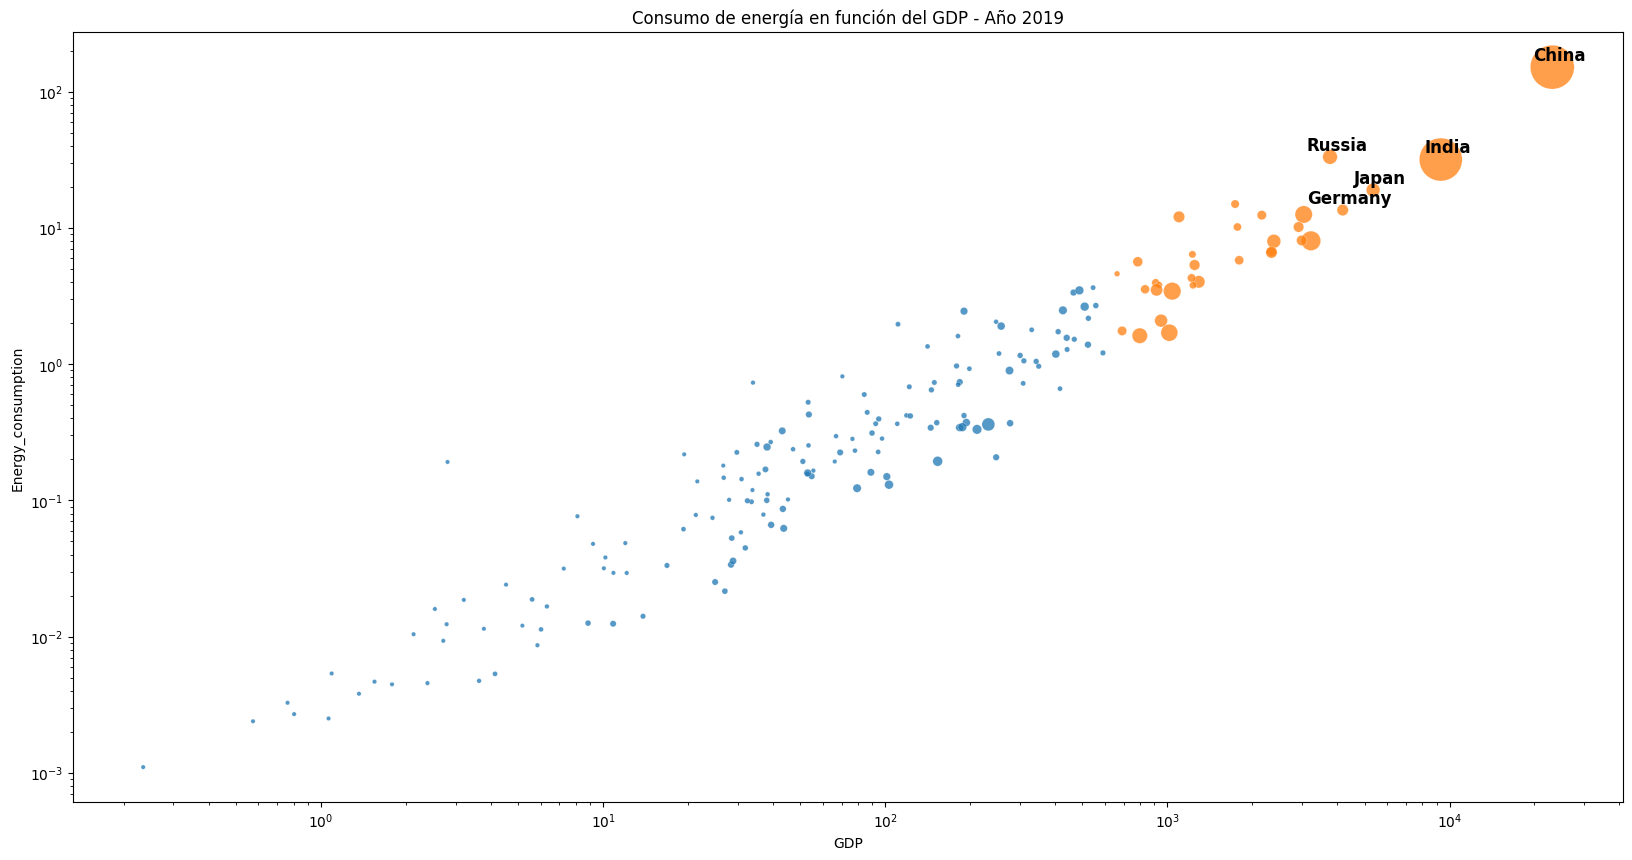

In [ ]:
# Obtener la lista de años únicos. Es cuando aparecen más países
years = df[df['Year'] > 1992]['Year'].unique() # Cuando tenemos datos de casi todos los países

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(20, 10))

# Función para actualizar el gráfico en cada fotograma de la animación
def update(year):
    # Limpiar el eje antes de dibujar el nuevo gráfico
    ax.clear()

    # Filtrar el DataFrame por el año actual
    df_energy = df[(df['Energy_type'] == 'todas') & (df['Year'] == year)]

    # Crear el gráfico de dispersión
    scatter = sns.scatterplot(
        ax=ax, data=df_energy, x="GDP", y="Energy_consumption", hue='Rico_vs_pobre', size="Population",
        sizes=(10, 1000), alpha=0.75)

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlabel('GDP')
    ax.set_ylabel('Energy_consumption')
    ax.set_title(f'Consumo de energía en función del GDP - Año {year}')

    # Ajustar la leyenda
    ax.legend().remove()

    # Etiquetar los países seleccionados
    for country in countries_to_label:
        if country in df_energy['Country'].values:
            country_data = df_energy[df_energy['Country'] == country]
            for _, row in country_data.iterrows():
                ax.annotate(
                    country,
                    (row['GDP'], row['Energy_consumption']),
                    textcoords="offset points",
                    xytext=(5,5),
                    ha='center',
                    fontsize=12,
                    color='black',
                    weight='bold'
                )

# Crear la animación
anim = FuncAnimation(fig, update, frames=years, interval=1000, repeat=False)

anim.save('energy_consumption_GDP.mp4', writer='ffmpeg', fps=1)  # Cambia 'ffmpeg' a 'imagemagick' para guardar como GIF

# Mostrar la animación en una ventana de visualización (opcional)
plt.show()


# **Cómo se relaciona la energy_consumption_per capita y el GDP**

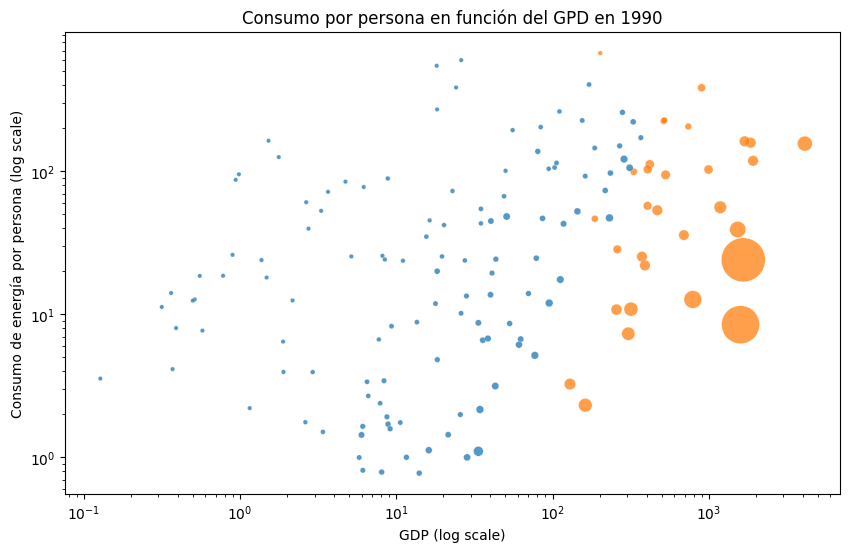

In [ ]:
###Energy production vs CO2 emission como evoluciona esta correlación?


# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crea el scatterplot con seaborn
sns.scatterplot(
    ax=ax, data=df_energy_tot[df_energy_tot['Year']==1990], x="GDP", y="Energy_intensity_per_capita", hue='Rico_vs_pobre', size="Population",
    sizes=(10, 1000), alpha=0.75
)

# Ajusta el título y las etiquetas
ax.set_title('Consumo por persona en función del GPD en 1990')
ax.set_xlabel('GDP (log scale)')
ax.set_ylabel('Consumo de energía por persona (log scale)')

# Ajustar la leyenda
ax.legend().remove()

# Configura las escalas logarítmicas
ax.set_xscale('log')
ax.set_yscale('log')

# Muestra el gráfico
plt.show()

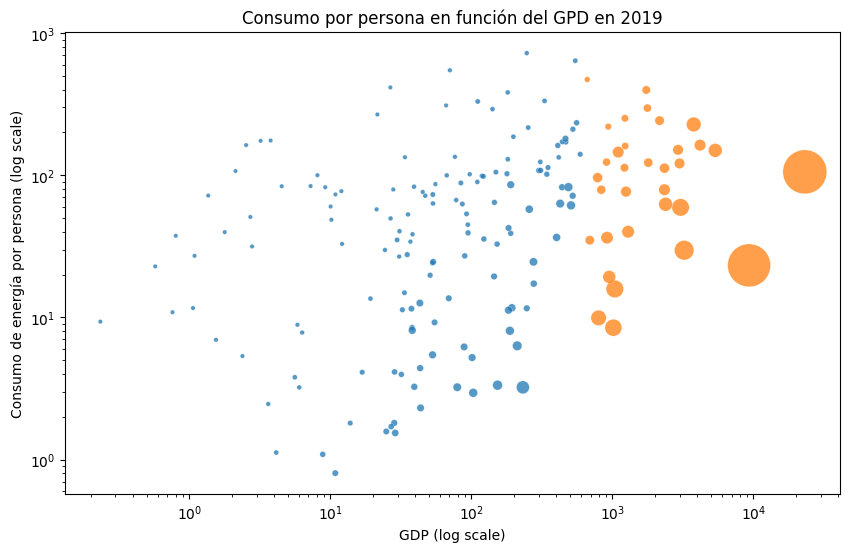

In [ ]:
###Energy production vs CO2 emission como evoluciona esta correlación?


# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crea el scatterplot con seaborn
sns.scatterplot(
    ax=ax, data=df_energy_tot[df_energy_tot['Year']==2019], x="GDP", y="Energy_intensity_per_capita", hue='Rico_vs_pobre', size="Population",
    sizes=(10, 1000), alpha=0.75
)

# Ajusta el título y las etiquetas
ax.set_title('Consumo por persona en función del GPD en 2019')
ax.set_xlabel('GDP (log scale)')
ax.set_ylabel('Consumo de energía por persona (log scale)')

# Ajustar la leyenda
ax.legend().remove()

# Configura las escalas logarítmicas
ax.set_xscale('log')
ax.set_yscale('log')

# Muestra el gráfico
plt.show()